## Curve fitting and the $\chi^2$ error surface
#### Material to accompany Hughes and Hase Section 6.5, this time with a nonlinear fit (Gaussian)

Tom Solomon, March 2021; based on curve_fit_w_contour (Marty Ligare, August 2020) that does a linear fit.

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import urllib   # for importing from a URL

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define  functions

In [3]:
def f(x,A,x0,b,c):
    '''Simple Gaussian function with amplitude A, center x0, width b and offset c'''
    return A*np.exp(-1.0*(x-x0)**2/b) + c

def chi2(x, y, u, A, x0, b, c):
    '''Chisquare as a function of data (x, y, and yerr=u), and model 
    parameters Amplitude A, center x0, width b and offset c'''
    return np.sum((y - f(x, A, x0, b, c))**2/u**2)

### Linear fit to data for $A$, $x_0$, $b$ and $c$

#### Data to be fit:

In [4]:
g = urllib.request.urlopen('https://www.eg.bucknell.edu/~phys310/skills/data_analysis/GaussianData.dat')
data = np.loadtxt(g)
# data = np.loadtxt("GaussianData.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
# data = np.array([[1, 2.947032612427293, 0.5],
# [2, 6.168779380682309, 0.5],
# [3, 7.1618838821688, 0.5],
# [4, 9.590549514954866, 0.5],
# [5, 11.20657, 0.5]])

x, y, u = data.T

<IPython.core.display.Javascript object>


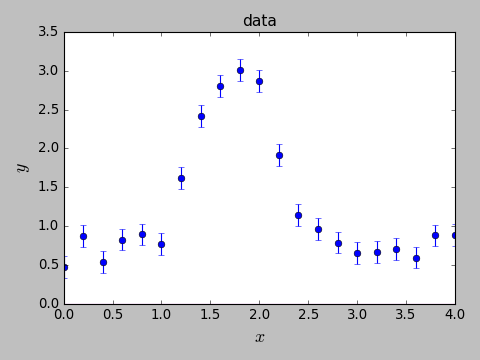

In [5]:
xc = np.linspace(0,4,201) # quasi-continuous set of x's for function plot
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,4) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### Initial estimates for parameters

In [6]:
# I am purposefully picking some so-so values because as long as we are
# close, the fitting should be able to make it work.
A = 2.0
x0 = 1.5
b = 0.5
c= 0.5
p0 = A, x0, b, c

<IPython.core.display.Javascript object>


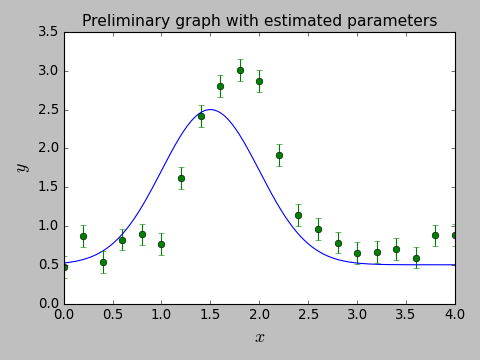

In [7]:
plt.figure()
xc = np.linspace(0,4,201)
yc = f(xc, *p0)
plt.plot(xc, yc)
plt.errorbar(x,y,u,fmt='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Preliminary graph with estimated parameters");

#### Perform fit

In [8]:
popt, pcov = optimize.curve_fit(f, x, y, p0, sigma=u, absolute_sigma=True)
A = popt[0]
x0 = popt[1]
b = popt[2]
c = popt[3]

αA = np.sqrt(pcov[0,0])
αx0 = np.sqrt(pcov[1,1])
αb = np.sqrt(pcov[2,2])
αc = np.sqrt(pcov[3,3])

print("A =", A,"+/-", αA,"\n")
print("x0 =", x0,"+/-", αx0,"\n")
print("b =", b,"+/-", αb,"\n")
print("c =", c,"+/-", αc,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
# print("reduced chi2 = chi2/(len(x)-len(popt)) =", chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

A = 2.4275159277659473 +/- 0.0981189904595323 

x0 = 1.757434802419164 +/- 0.01689107154392164 

b = 0.2889595362371085 +/- 0.02938444989729009 

c = 0.6993908206018963 +/- 0.04241556039848094 

covariance matrix = 
 [[ 9.62733629e-03  1.19406380e-09 -9.56886229e-04 -1.27216656e-03]
 [ 1.19406380e-09  2.85308298e-04  5.25913391e-10 -1.60653539e-09]
 [-9.56886229e-04  5.25913391e-10  8.63445896e-04 -6.05692897e-04]
 [-1.27216656e-03 -1.60653539e-09 -6.05692897e-04  1.79907976e-03]] 

chi2 = 20.368136771219355


#### Written in standard notation

### A = 2.43 $\pm$ 0.10

### $x_0$ = 1.757 $\pm$ 0.017

### b = 0.29 $\pm$ 0.03

### c = 0.70 $\pm$ 0.04

(Note: I generated this data with A = 2.50, $x_0$ = 1.75, b = 0.27 and c = 0.65, with some additive noise with standard deviation of 0.14, so the fit came up with the "true" parameters within two uncertainties.)

<IPython.core.display.Javascript object>


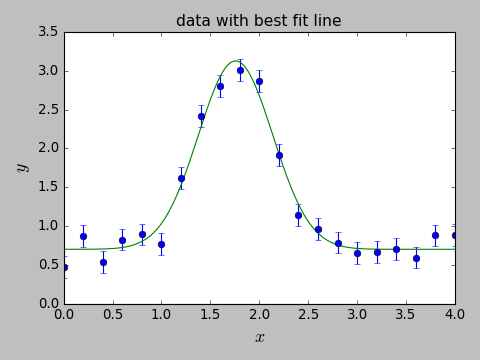

In [9]:
xc = np.linspace(0,4,201) # quasi-continuous set of x's function plot
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,4)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, A, x0, b, c));

#### Residuals:

<IPython.core.display.Javascript object>


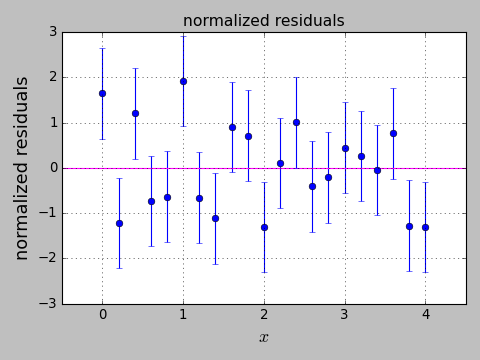

In [12]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,A, x0, b, c)-y)/u,1,fmt='o')
plt.xlim(-0.5,4.5);

The normalized residuals look fine.  First, most but not all are between -1 and +1.  Second, there are no patterns in the residuals; rather, they are randomly fluctuating between negative and positive.

#### Make "data" for contour plot

We have four parameters, so we should plot two at a time.  Let's pair up A with c and x0 with b.  Start with A and c

+ Choose ranges of $A$ and $c$ for contour plot.  The ranges should range from below to above the best fit values for each.  If the range ends up crappy, you can always change the range and re-do the calculations, or you can zoom in and out of the contour plot.
+ Calculate values of $\chi^2$ at grid points

In [13]:
AA = np.linspace(2, 3.0, 201)
cc = np.linspace(0, 1, 201)

Z = np.zeros((len(AA),len(cc)))

for i in range(len(AA)):
    for j in range(len(cc)):
        Z[j,i] = chi2(x, y, u, AA[i], x0, b, cc[j]) - chi2(x, y, u, *popt)

<IPython.core.display.Javascript object>


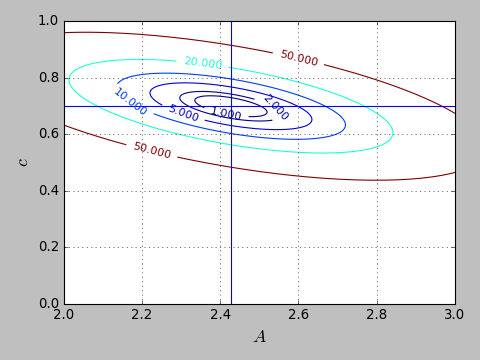

In [14]:
plt.figure()
AA, cc = np.meshgrid(AA, cc)
CS = plt.contour(AA, cc, Z, levels=[1,2,5,10,20,50])
plt.xlabel('$A$')
plt.ylabel('$c$')
plt.grid()
plt.axhline(c)
plt.axvline(A)
plt.clabel(CS, inline=1, fontsize=10);

#### Let's focus on the $\chi^2_{reduced} - \chi^2_{best} = 1$ contour.  That's where we can determine uncertainties for A and c

<IPython.core.display.Javascript object>


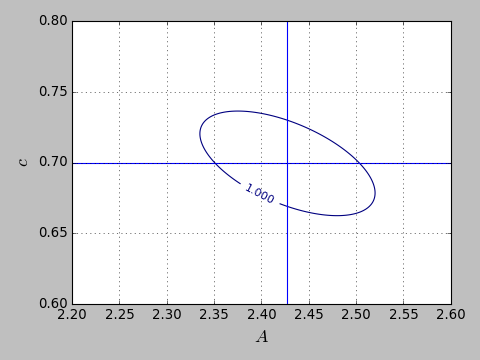

In [15]:
AA = np.linspace(2.2, 2.6, 201)
cc = np.linspace(0.6, 0.8, 201)

Z = np.zeros((len(AA),len(cc)))

for i in range(len(AA)):
    for j in range(len(cc)):
        Z[j,i] = chi2(x, y, u, AA[i], x0, b, cc[j]) - chi2(x, y, u, *popt)

plt.figure()
AA, cc = np.meshgrid(AA, cc)
CS = plt.contour(AA, cc, Z, levels=[1])
plt.xlabel('$A$')
plt.ylabel('$c$')
plt.grid()
plt.axhline(c)
plt.axvline(A)
plt.clabel(CS, inline=1, fontsize=10);

#### Okay, so the contour $\chi^2_{reduced} - \chi^2_{best} = 1$ curve goes from a minimum in A from around 2.33 to a maximum of around 2.52, so if we take half of that range, that would get us $\alpha_A \approx 0.10$, which is consistent with what the curve fitting routine returned for the uncertainty.  And the same contour curve goes from a minimum in c of around 0.67 to a maximum of around 0.73, so half of that range would get us $\alpha_c \approx 0.03$, which isn't exactly what the curve fitting returned, but frankly an uncertainty of 0.03 vs 0.04 isn't worth losing sleep over.

#### Now let's look at the other two parameters $x_0$ and $b$.  Generate an array with $x_0$ going from below to above the best fit value of 1.79 and $b$ going from below to above the best fit value of 0.29

In [16]:
x0b = np.linspace(1.5, 2.0, 201)
bb = np.linspace(0.1, 0.5, 201)

Z = np.zeros((len(x0b),len(bb)))

for i in range(len(x0b)):
    for j in range(len(bb)):
        Z[j,i] = chi2(x, y, u, A, x0b[i], bb[j], c) - chi2(x, y, u, *popt)

<IPython.core.display.Javascript object>


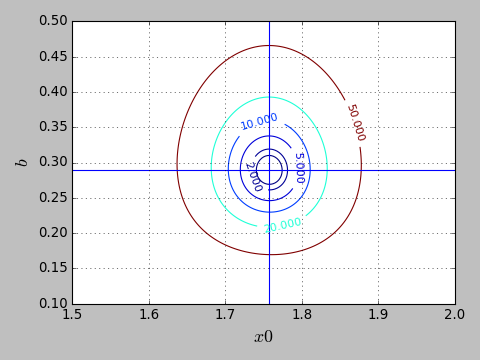

In [17]:
plt.figure()
x0b, bb = np.meshgrid(x0b, bb)
CS = plt.contour(x0b, bb, Z, levels=[1,2,5,10,20,50])
plt.xlabel('$x0$')
plt.ylabel('$b$')
plt.grid()
plt.axhline(b)
plt.axvline(x0)
plt.clabel(CS, inline=1, fontsize=10);

#### Okay, now zoom in on the  $\chi^2_{reduced} - \chi^2_{best} = 1$ contour.  That's where we can determine uncertainties for x0 and b

<IPython.core.display.Javascript object>


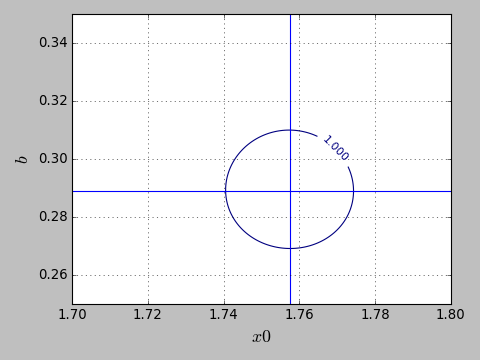

In [18]:
x0b = np.linspace(1.7, 1.8, 201)
bb = np.linspace(0.25, 0.35, 201)

Z = np.zeros((len(x0b),len(bb)))

for i in range(len(x0b)):
    for j in range(len(bb)):
        Z[j,i] = chi2(x, y, u, A, x0b[i], bb[j], c) - chi2(x, y, u, *popt)
        
plt.figure()
x0b, bb = np.meshgrid(x0b, bb)
CS = plt.contour(x0b, bb, Z, levels=[1])
plt.xlabel('$x0$')
plt.ylabel('$b$')
plt.grid()
plt.axhline(b)
plt.axvline(x0)
plt.clabel(CS, inline=1, fontsize=10);

# I then used the zoom feature, i.e., hold "cntl" key, and right-click and drag to zoom in.  
# You could also simply narrow the range to zoom in.


#### Okay, so the contour $\chi^2_{reduced} - \chi^2_{best} = 1$ curve goes from a minimum in $x_0$ from around 0.04 to a maximum of around 0.074, so if we take half of that range, that would get us $\alpha_x0 \approx 0.017$, which is consistent with what the curve fitting routine returned for the uncertainty.  And the same contour curve goes from a minimum in b of around 0.27 to a maximum of around 0.31, so half of that range would get us $\alpha_b \approx 0.02$, which isn't exactly what the curve fitting returned, but frankly an uncertainty of 0.02 vs 0.03 isn't worth losing sleep over.

#### So, yeah.  That's basically where the uncertainties in the curve-fitting come from.